# 1.020 2D Project Term 3 2021

Group: One (1)

Class: SC05

Names in alphabetical order
* 1005347 Abigail Tan Juan Hong
* 1005002 Lawrence Kevin Sagaya Anthony
* 1004881 Lin Yutian
* 1005051 Mohammad Alif Daffa Bin Mohammad Yusof
* 1004210 Pyae Phyo Aung @ Elvis Kason Lin

Everyone contributed to the project equally.

___

# Part I: Preprocessing

In [108]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part 2 — Modelling X

## Problem statement
Singapore has been pushing for an endemic strategy of living with the virus. However, it is clear that the necessary regulations are stll needed to ensure that the healthcare system can cope with the ongoing surge in cases, and to allow new healthcare protocols to stabilise. In the current preparatory stage of its reopening, and will continue to rely on vaccination and testing to keep the Covid-19 situation under control, amid a recent spike in infections. We are to help the government to make a model to predict the number of daily cases based on the stringency-index of the current measures and all other useful predictors found. As a reference, the government can use this model to see how feasible their next steps of reopening and incoming measures are while ensuring the capacity of the healthcare system under the current vaccination, testing and infection situations.  

## Data Processing
#####  Link to data sources:
  * https://github.com/owid/covid-19-data/tree/master/public/data
  * Covid-19 dataset (a collection of the covid-19 data worldwide) maintained by the our world in data team

#####  Choose the useful data records from the dataset with the worldwide covid-related data:
  * Step 1: Target at the data records of Singapore since the environment of our defind problem is Singapore. 
  * Step 2: As the vaccinations are available to the public from the beginning of 2021 (the first vaccination data is found at 11/01/2021), the data records we used are all after 11/01/2021.  
  * Step 3: To the convenince of our defined problem, we extract all the data records of Singapore after 11/01/2021 to a new 'csv' file (filename: covid_data_singapore.csv).

In [109]:
# read the csv file of covid-related data of Singapore from 11/01/2021 to 27/10/2021.
df = pd.read_csv("covid_data_singapore.csv")
display(df)

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,SGP,Asia,Singapore,2021-01-11,58929,22,29.714,29,0,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
1,1,SGP,Asia,Singapore,2021-01-12,58946,17,28.143,29,0,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
2,2,SGP,Asia,Singapore,2021-01-13,58984,38,29.143,29,0,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
3,3,SGP,Asia,Singapore,2021-01-14,59029,45,30.857,29,0,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
4,4,SGP,Asia,Singapore,2021-01-15,59059,30,31.857,29,0,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,SGP,Asia,Singapore,2021-10-23,169261,3598,3448.714,300,6,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
286,286,SGP,Asia,Singapore,2021-10-24,172644,3383,3495.143,315,15,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
287,287,SGP,Asia,Singapore,2021-10-25,175818,3174,3583.857,329,14,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
288,288,SGP,Asia,Singapore,2021-10-26,179095,3277,3481.429,339,10,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN


##### Choose the approriate predictors -- Experiment:
* Target: The number of daily cases (the column named "new_cases" in the data frame.
* Step 1: Recall the purpose of our model. Since the purpose is to see how feasible the next loosen measures are, it is necessary to consider the "stringency_index" of the current measures as an important predictor. 
* Step 2: Brainstorm the relevant variables which will effect the target "the number of daily cases". Potential predictors: "total_vaccinations", "people_fully_vaccinated", "people_vaccinated", "new_tests_smoothed", "total_cases".
* Step 3: Normalize the data of these potential predictors and plot the scatter plot of the target abd each potential predictor respectively. 
* Step 4: Calculate the correlations of each scatter plot.
* Step 5: Analyse and compare these potential predictors.

In [110]:
# The function is used to normalize the feature using z normalization and record the mean and std used.
def normalize_z(df):
    dfout = df.copy()
    mean = df.mean(axis = 0)
    std = df.std(axis = 0)
    dfout = (df - mean) / std
    return dfout, mean, std

# The function is used to get features and targets for our training and testing cases.
def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

In [111]:
sns.set()
# The chosen predictor variables
potential_predictors = ["total_vaccinations", "people_fully_vaccinated", "people_vaccinated", "new_tests_smoothed", "total_cases", "stringency_index"]
# get the potential features and targets from data frame
df_potential_features, df_target = get_features_targets(df, potential_predictors, ["new_cases"])
# normalize the potential predictors using z normalization
df_potential_features = normalize_z(df_potential_features)[0]

Correlation: -0.2229096540666373


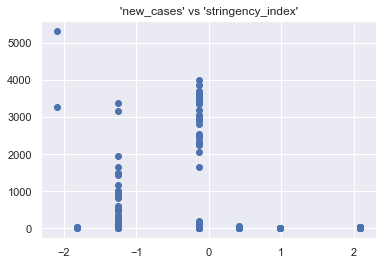

In [116]:
# Plot the data using scatter plot to see the relationship between stringency_index of the measures and daily_cases
plt.scatter(df_potential_features['stringency_index'], df_target)
ax = plt.gca()
ax.set_title("'new_cases' vs 'stringency_index'")
print("Correlation:", df_target['new_cases'].corr(df_potential_features['stringency_index']))

Correlation: 0.9510126539760535


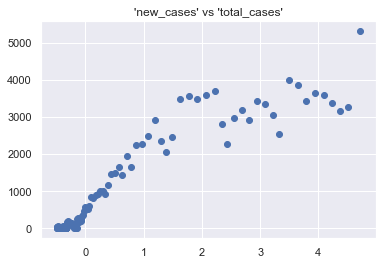

In [117]:
# Plot the data using scatter plot to see the relationship between the number of total_cases and daily_cases
plt.scatter(df_potential_features['total_cases'], df_target)
ax = plt.gca()
ax.set_title("'new_cases' vs 'total_cases'")
print("Correlation:", df_target['new_cases'].corr(df_potential_features['total_cases']))

Correlation: -0.05070475679907711


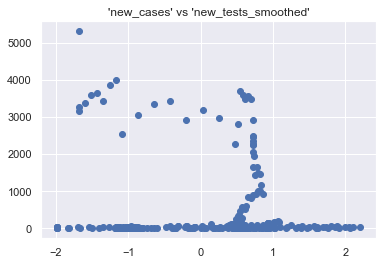

In [118]:
# Plot the data using scatter plot to see the relationship between the number of daily tests provided and daily_cases
plt.scatter(df_potential_features['new_tests_smoothed'], df_target)
ax = plt.gca()
ax.set_title("'new_cases' vs 'new_tests_smoothed'")
print("Correlation:", df_target['new_cases'].corr(df_potential_features['new_tests_smoothed']))

Correlation: 0.5844910636491097


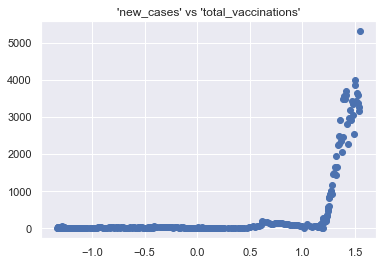

In [119]:
# Plot the data using scatter plot to see the relationship between the number of total_vaccinations and daily_cases
plt.scatter(df_potential_features['total_vaccinations'], df_target)
ax = plt.gca()
ax.set_title("'new_cases' vs 'total_vaccinations'")
print("Correlation:", df_target['new_cases'].corr(df_potential_features['total_vaccinations']))

Correlation: 0.45152731209218233


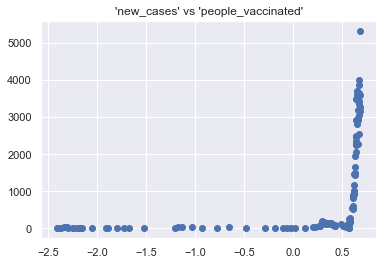

In [120]:
# Plot the data using scatter plot to see the relationship between the number of daily tests provided and daily_cases
plt.scatter(df_potential_features['people_vaccinated'], df_target)
ax = plt.gca()
ax.set_title("'new_cases' vs 'people_vaccinated'")
print("Correlation:", df_target['new_cases'].corr(df_potential_features['people_vaccinated']))

Correlation: 0.5830263432433892


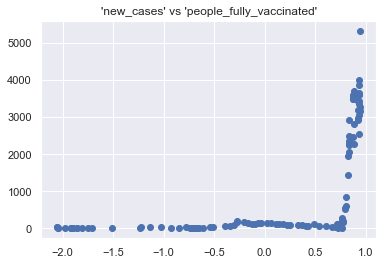

In [121]:
# Plot the data using scatter plot to see the relationship between the number of daily tests provided and daily_cases
plt.scatter(df_potential_features['people_fully_vaccinated'], df_target)
ax = plt.gca()
ax.set_title("'new_cases' vs 'people_fully_vaccinated'")
print("Correlation:", df_target['new_cases'].corr(df_potential_features['people_fully_vaccinated']))

##### Choose the approriate predictors -- Analysis:
Correlation coefficients (range: [-1, 1]) are used to measure the strength of the linear relationship between two variables and a larger absolute value of the correlation coefficient indicates a stronger relationship between them. 

By the correlation coefficients and visualization, we found:
* The number of daily new cases and the number of total cases so far have a strong linear relationship since the corellation coefficient is around 0.95. Thus, the feature "total_cases" can a leading predictor in our model.
* The plots of the three potential features "total_vaccinations", "people_fully_vaccinated", "people_vaccinated" are so similar and the meaning of these three features are almost the same. Thus, we decide to keep the feature "total_vaccinations" whose data is almost complete for the target dates in the dataset and the correlation coefficient is higher compared with the other two features.
* Moreover, the absolute values of the correlation coefficients of some features like "new_tests_smoothed" and "stringency_index" are relatively low. However, it is hard to tell whether they will contribute to the model. Thus, we will keep these potential predictors first to see their effects on the model by the iterative experiments later and do the corrsponding changes. 

Therefore, for now, four features "total_cases", "stringency_index", "new_tests_smoothed" and "total_vaccinations" will be accounted into our model. However, since the accuracy of our model is closely related to the choice of predictors, changes will be made in the iterative process of experiments according to the training result using diffent sets of predictors chosen from the current four potential predictors.  

In [73]:
full_feature_columns = ["total_vaccinations", "new_tests_smoothed", "total_cases", "stringency_index"]

##### Clean up the data:
  * Step 1: Remove outliers. There are three records of which the daily cases ('new_cases') are 0. After checking manually, these three important outliers are considered to be caused by data entry errors. Thus, we removed these three records.
  * Step 2: Handle missing data. There are some missing data for the number of total vaccinations. We notice that there is a column named "new_vaccinations_smoothed" which can help produce a complete series of daily figures averaged over a rolling 7-day window. By adding this number to the last number of total vaccinations, we conpensate for the missing data for the number of total vaccinations manually. 

In [74]:
# Remove the outliers (of which the daily cases are 0).
df = df[df['new_cases'] != 0]
print(df.shape)

(287, 66)


## Model and Iteration

##### Choose the algorithm
* Multiple linear regression
* Reason: 
    * In this model we want to include more than one feature and we want to have a hypothesis that is not a simple line.   
    * Based on the analysis of these features in the process of choosing the features, we can find that some features have a relatively strong linear relationship with the target.
    

##### General idea of  improvement by iterations:
* The addition of unnecessary regressor variables will add noise. However some models are too simple to explain the relationship well. 
* Find which does better, the subset model or the full model.
    * A full model: a model considering all of the predictors
    * A subset model: a model after dropping one or more predictors
* Select the subset of predictors that do the best of all the candidate predictors.

NOTE: Based on our problem statement, the feature "stringency_index" will always be included.

##### Criteria for selecting the best models:
* Smallest mean absolute error
* Reason:
    * The metric of R-squared can never be used to choose the best subset of predictors, since the value of R^2 increases with the increase in the number of predictors no matther whether the added predictors add any value to the model. 
    * The target values (the number of daily covid-19 cases) vary from the single digits to thousands so that the errors will also be relatively larger when the actual target values are large. Thus, it is not suitable to use the mean square error (MSE) since MSE penalizes large errors.
    * By conparison, MAE is the relatively better choice. It can help us understand the errors  intuitively.

In [75]:
# This function is used to split the dataset into training and testing based on the given test_size.
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

# The function is used to normalize the feature using z normalization and record the mean and std used.
def normalize_z(df):
    dfout = df.copy()
    mean = df.mean(axis = 0)
    std = df.std(axis = 0)
    dfout = (df - mean) / std
    return dfout, mean, std

# This function is to convert the data frame to a numpy array and add a column of constant 1s in the first column.
def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    feature = df_feature.to_numpy().reshape(-1, cols)
    X = np.concatenate((np.ones((feature.shape[0], 1)), feature), axis = 1)
    return X

# The function is to convert the data frame to a numpy array and change it into column vectors.
def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols)
    return target

In [76]:
# The function is used to compute the cost
def compute_cost(X, y, beta):
    m = X.shape[0]
    error = np.matmul(X, beta) - y
    error_sq = np.matmul(error.T, error)
    J = (1/(2*m)) * error_sq
    return J[0][0]

# The function is used to calculate the mean absolute error between the predicted and actual values.
def mean_absolute_error(X, y, beta):
    return np.sum(np.abs(X@beta - y)) / X.shape[0]

# The function is to find the beta to minimize the cost.
# It will return the the absolute error between the predicted and actual target, the percentage of the absolute error, beta and the costs in the iteration.
def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.ones((num_iters, 1))
    err_storage = []
    m = X.shape[0]
    for i in range(num_iters):
        error = np.matmul(X, beta) - y
        driv = np.matmul(X.T, error)
        beta = beta - (alpha/m)*driv
        J = compute_cost(X, y, beta)
        J_storage[i] = J
        err_storage.append(mean_absolute_error(X, y, beta))
    return err_storage, beta, J_storage

##### Experiment 1 
* Predictor subset 1: {"stringency_index"} 

MAE: 573.4251068567393


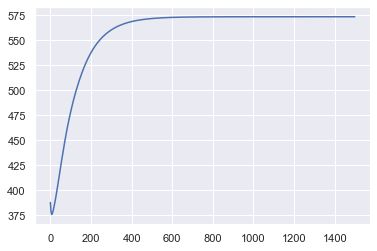

In [77]:
predictor_subset = ['stringency_index']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

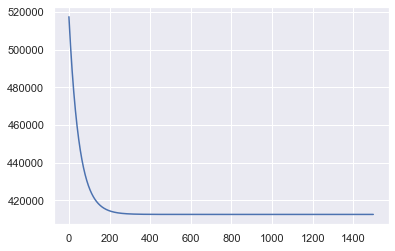

In [78]:
plt.plot(J_storage)

##### Experiment 2
* Predictor subset 2: {"stringency_index", "total_cases"} 

MAE: 132.27105055508386
Beta: [[391.87551073]
 [-27.96792106]
 [892.15221115]]


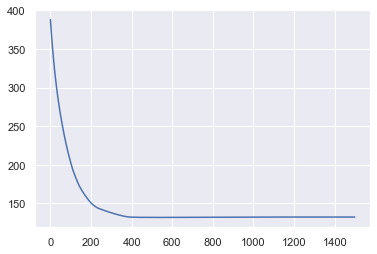

In [79]:
predictor_subset = ['stringency_index', 'total_cases']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
print('Beta:', beta)
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Experiment 3
* Predictor subset 3: {"stringency_index", "total_vaccinations"} 

MAE: 480.7557671719157


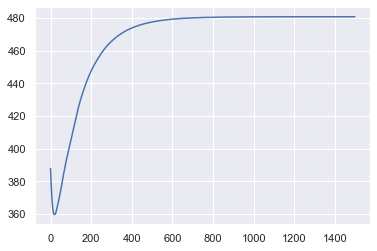

In [80]:
predictor_subset = ['stringency_index', 'total_vaccinations']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Experiment 4
* Predictor subset 4: {"stringency_index", "new_tests_smoothed"} 

MAE: 572.7371141714203


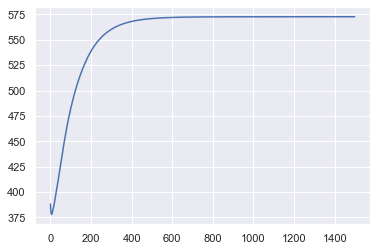

In [81]:
predictor_subset = ['stringency_index', 'new_tests_smoothed']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Experiment 5
* Predictor subset 5: {"stringency_index", "total_vaccinations", "new_tests_smoothed"} 

MAE: 471.0175465462134


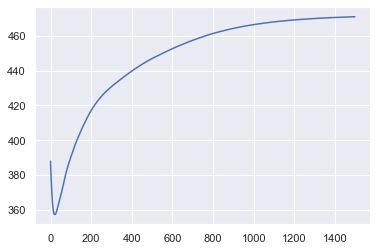

In [82]:
predictor_subset = ['stringency_index', 'total_vaccinations', "new_tests_smoothed"]

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Experiment 6
* Predictor subset 6: {"stringency_index", "total_vaccinations", "total_cases"} 

MAE: 143.89080906815855


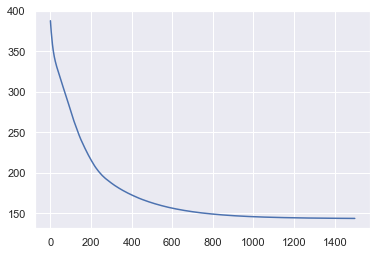

In [83]:
predictor_subset = ['stringency_index', 'total_vaccinations', 'total_cases']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Experiment 7
* Predictor subset 7: {"stringency_index", "total_cases", "new_tests_smoothed"} 

MAE: 150.66746202998857


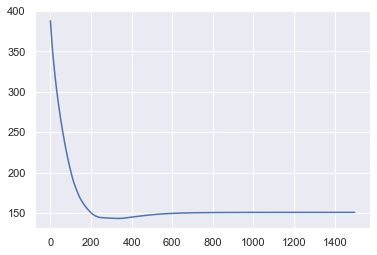

In [84]:
predictor_subset = ['stringency_index', 'total_cases', 'new_tests_smoothed']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Experiment 8
* Predictor subset 8 ( full set ): {"stringency_index", "total_cases", "new_tests_smoothed", "total_vaccinations"} 

MAE: 150.9440184221978


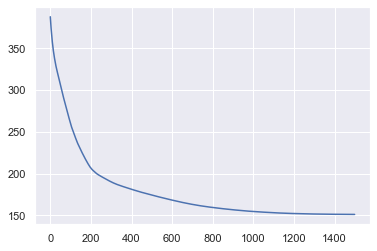

In [85]:
predictor_subset = ["stringency_index", "total_cases", "new_tests_smoothed", "total_vaccinations"]

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Analysis of the experiments
* The lowest MAE is found in the experiment 2 using the two predictors "total_cases" and "stringency_index". The features "new_cases_smoothed" and "total_vaccinations" are adding the noises to the model.
* It can be easily deduced from the experiments' results that the feature "total_cases" is the leading predictor in this model.
    * This discovery corresponds to our pre-analysis of the data in the last section. The high correlation coefficient of "total_cases" with the target indicates their strong linear relatioship.
* Based on the above discovery, we are worried that whether the feature "stringency_index" also make more noises in the model, but we ignored the noises made by it since it is always included based on our define problem. Thus, we perform another experiment using the feature "total_cases" only to see whether the MAE will be smaller than which we get in the experiment 2. If so, sadly it means the stringency of the regualtions doesn't effect the daily cases and our defined problem needs to be reconsidered.
* Luckily, based on the result of the extra experiment below, the feature "stringency_index" contributes to our model indeedly. 

MAE: 138.62021943581388


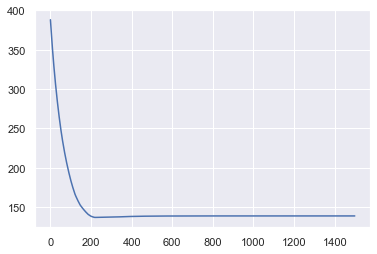

In [86]:
# Extra experiment to test whether "stringency_index" contributes to the model
# The only predictor: {"total_cases"}

predictor_subset = ['total_cases']

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, predictor_subset, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z = normalize_z(df_features_train)[0]

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(predictor_subset)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

##### Selection of model
Therefore, we could decide the model we use.
* Algorithm: Multiple Linear Regression
* Predictors: "total_cases"(the number of total cases so far) and "stringency_index" (the stringency of the regulations)
* Target: "new_cases" (the number of daily cases)
* y = 391.87551073 - 27.96792106 x1 + 892.15221115 x2 
    * x1: "stringency_index", x2: "total_cases"
    * Here, the coefficient of the feature "stringency_index" is negative. This corresponds to our pre-analysis of the data in the last section. The correlation coefficient of stringency_index with the target calculated in the "data" section is negative. It indicates that the feature "stringency_index" has a negative relationship with the target.

MAE: 132.27105055508386
Beta: [[391.87551073]
 [-27.96792106]
 [892.15221115]]


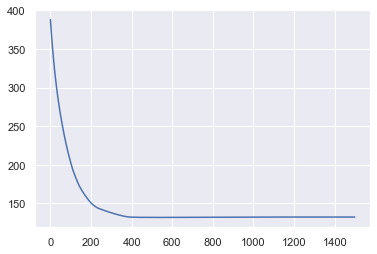

In [92]:
final_predictors = ["stringency_index", "total_cases"]

# get the features and targets from data frame
df_features, df_target = get_features_targets(df, final_predictors, ["new_cases"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize using z normalization
df_features_train_z, traing_features_mean, training_features_std = normalize_z(df_features_train)

# Prepare X and y
X = prepare_feature(df_features_train_z)
y = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((len(final_predictors)+1, 1))

# call the gradient_descent function
mae_storage, beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
print('MAE:', mae_storage[-1])
print('Beta:', beta)
# Visualize the mean absolute error in the process of iteration
plt.plot(mae_storage)

## Model Evaluation

##### Get and visualize the predicted values
* To get the predicted values, we perform some different operations from what is taught in class on the normalization of the features in the testing set. We reused the mean and standard deviation of the features in the training set when normalizing the features in the testing set, rather than applying a different scaling on the training set from the testing set by performing z-normalization on themselves separately.  
    * Reference: https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well
    * The exact scaling should be applied on the features in the testing set as the training set. It means that the mean and standard deviation used to normalize the features in the training set should be stored and reused in the normalization of the features in the testing set. 

In [93]:
# The function is used to normalize the feature using z normalization and record the mean and std used.
def normalize_z(df):
    dfout = df.copy()
    mean = df.mean(axis = 0)
    std = df.std(axis = 0)
    dfout = (df - mean) / std
    return dfout, mean, std

# The fuction is used to normalize the features in the testing set using the same mean and std as the training set
def normalize_testing_features(df, mean, std):
    dfout = df.copy()
    dfout = (df - mean) / std
    return dfout

# normalize the features in the testing set and get the predicted daily cases given the features in the testing sets 
def predict(df_feature, beta):
    X = prepare_feature(df_features_test)
    return predict_norm(X, beta)

# get the predicted daily cases given the features in the testing sets 
def predict_norm(X, beta):
    return np.matmul(X, beta)

In [94]:
# get the mean and standard deviation used in the z-normalization of the testing set
testing_features_mean = training_features_mean.to_numpy()
testing_features_std = training_features_std.to_numpy()

# normalize the features in the testing set using the same mean and std as the training set
df_features_test = normalize_testing_features(df_features_test, mean, std)

# call the predict() method to get the predicted values of the testing set
pred = predict(df_features_test, beta)

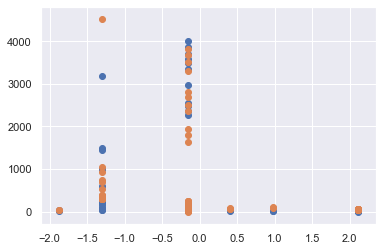

In [95]:
# visualize compare the predicted targets with the actual targets 
plt.scatter(df_features_test["stringency_index"], df_target_test)
plt.scatter(df_features_test["stringency_index"], pred)

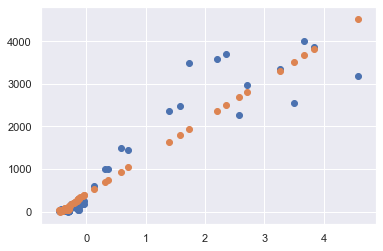

In [96]:
# visualize and compare the predicted targets with the actual targets 
plt.scatter(df_features_test["total_cases"], df_target_test)
plt.scatter(df_features_test["total_cases"], pred)

##### Metrics for the testing set
* R-squared value
* Mean Absolute Error (MAE)
* Reason: 
    * The target values (the number of daily covid-19 cases) vary from the single digits to thousands so that the errors will also be relatively larger when the actual target values are large. Thus, it is not suitable to use the mean square error (MSE) since MSE penalizes large errors.
    * R-aquared metric measures the strength of the relationship between the model and the dependent variables. Thus, when evaluating the accuracy of our model, it is good to use this metric to see how strong the relationship is between our model and chosen predictors.
    * MAE is the average of the absolute difference between the trget value and he value predicted. MAE is sensitive to the the outliers but it does not penalize large errors. In our cases, the outliers are not prominent. Thus, it is a good metric for our model.

In [97]:
# The function is to calculate the r^2 as a metric
def r2_score(y, ypred):
    y_mean = np.mean(y) 
    # ss_tot = np.sum((y-y_mean)**2)
    ss_tot = np.matmul((y-y_mean).T, y-y_mean)
    ss_res = np.matmul((y-ypred).T, y-ypred)
    r2 = 1-ss_res/ss_tot
    return r2[0][0]

# The function is used to calculate the mean absolute error between the predicted and actual values.
def m_a_e(target, pred):
    return np.sum(np.abs(pred - target)) / target.shape[0]

In [98]:
# change target test set to a numpy array
target = prepare_target(df_target_test)

# calculate r2 score by calling a function
r2 = r2_score(target, pred)

# calculate the mean absolute error by calling a function
mae = m_a_e(target, pred)

print('r^2:', r2)
print('MAE:', mae)

r^2: 0.8984290504908874
MAE: 172.72767805308902


##### Analysis of the results

* R-Squared: 
    * It indicates how well the regression model fits the observed data.
    * The value of R-squared for the testing set is around 0.9 which reveals that 90% of the data fit our regression model. 
    * Thus, it can be deduced that our model is not either underfit or overfit.
* Mean Absolute Error:
    * It indicates the average difference between the actual and predicted values.
    * The value of MAE for the testing is around 172.7. It means that if the number of today's cases is 2000, it is very likely that the prediction is between 1827 and 2172. The error percentage is only around 8% which can be accepted when predicting the daily cases in practical. 

### Conclusion
* Through our model, it can be seen that the vaccination rate and the number of tests provided do not effect the number of daily cases much. This does not mean that vaccinations and regular tests are useless, since having a very weak relationship with the number of daily cases does not mean having little influence of the probability of being infected.  
* To predict the daily cases, the stringency of the current measures and the trend of total cases confirmed will be more useful. 
* Thus, if the government wants to use this model as a reference to see how bold a reopen measure can be in the case of ensuring a controllable number of confirmed cases and the healthcare system under the current situation, they can provide the data which shows the trend of the total cases and keep adjusting the stringency index of their expected measures until the predicted value reaches their expectation.  